Importing Libraries

In [52]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime as dt

Reading the dataframe

In [122]:
df = pd.read_csv('./travel_dataset/flights.csv')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [124]:
df.head(5)

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [125]:
df['month'] = df['date'].apply(lambda x: dt.strptime(x,"%m/%d/%Y").month)

In [126]:
df['price'] = df['price']

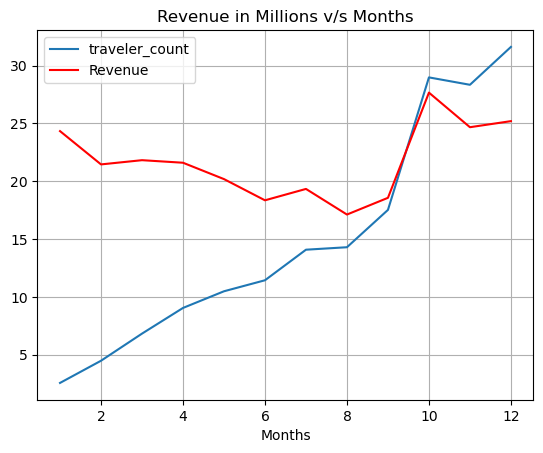

In [140]:
#Line Plot: Create a line plot using Matplotlib that illustrates the trend of class flewn by passengers over all the months.
# The x-axis should represent the months, while the y-axis should represent the traveler count and revenue, respectively. The line plot should
# display two lines, one for traveler count and another for revenue, showcasing their trends over time.
revenue =  df.groupby(['month'])[['price']].sum()/10**6
traveler_count = df.groupby(['month'])['month'].sum()/10**4
plt.plot(traveler_count,label = 'traveler_count')
plt.plot(revenue,c='r',label='Revenue')
plt.xlabel('Months')
plt.title('Revenue in Millions v/s Months')
plt.legend()
plt.grid()

([<matplotlib.patches.Wedge at 0x14762f1d0>,
 [Text(0.9998103558624837, 0.4586711810329203, 'Aracaju (SE)'),
  Text(0.38227372663024817, 1.0314391877024174, 'Brasilia (DF)'),
  Text(-0.4306085734624657, 1.0122135429150414, 'Campo Grande (MS)'),
  Text(-1.0939660250895713, 0.11505796778026137, 'Florianopolis (SC)'),
  Text(-0.7403731772290012, -0.8135401394152807, 'Natal (RN)'),
  Text(-0.12207106811099677, -1.093205677962862, 'Recife (PE)'),
  Text(0.46382898079670104, -0.9974280307736964, 'Rio de Janeiro (RJ)'),
  Text(0.8096450515778748, -0.7446307074352095, 'Salvador (BH)'),
  Text(1.0592687681863266, -0.29656310752523246, 'Sao Paulo (SP)')])

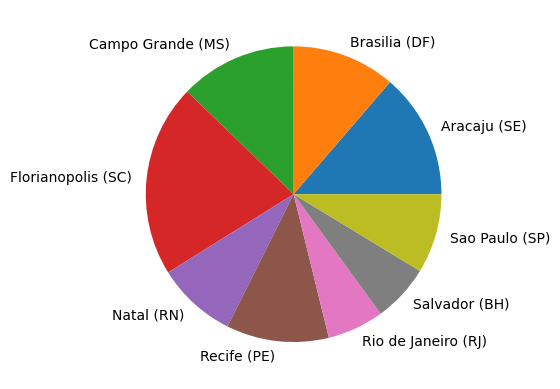

In [178]:
# Pie Chart: Generate a pie chart using Matplotlib to display the distribution of traveler count among the top five destinations for the entire year.
# Each slice of the pie should represent a destination, and its size should correspond to the proportion of travelers visiting that
# particular destination.
traveler_count = df.groupby(by=['to']).size().reset_index(name='counts')
plt.pie(traveler_count['counts'],labels=traveler_count['to'])

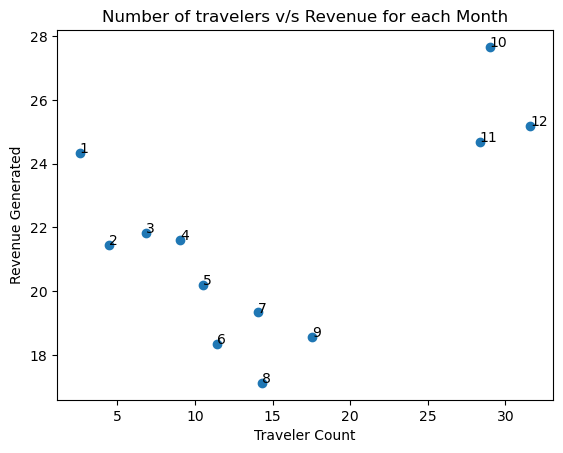

In [189]:
# Scatter Plot: Create a scatter plot using Matplotlib that demonstrates the relationship between the number of travelers and the revenue generated
# for each month. Each data point on the scatter plot should represent a month, with the x-coordinate representing the traveler count and the
# y-coordinate representing the revenue generated.
# Group the data by month and calculate the sum of traveler count and revenue
traveler_count = df.groupby(['month'])['month'].sum()/10**4
revenue =  df.groupby(['month'])[['price']].sum()/10**6

plt.scatter(traveler_count,revenue)
plt.xlabel('Traveler Count')
plt.ylabel('Revenue Generated')
plt.title('Number of travelers v/s Revenue for each Month')
for i in range(len(traveler_count)):
    plt.text(traveler_count.iloc[i],revenue.iloc[i],i+1)